In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

In [3]:
# Load the datasets
users = pd.read_csv(r"C:\Users\91932\Downloads\Users.csv",encoding='latin1')
books = pd.read_csv(r"C:\Users\91932\Downloads\Books .csv")
ratings =pd.read_csv(r"C:\Users\91932\Downloads\Ratings.csv",encoding='latin1')


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [7]:
print(users.describe(include='all'))

             User-ID                         Location            Age
count   278858.00000                           278858  168096.000000
unique           NaN                            57339            NaN
top              NaN  london, england, united kingdom            NaN
freq             NaN                             2506            NaN
mean    139429.50000                              NaN      34.751434
std      80499.51502                              NaN      14.428097
min          1.00000                              NaN       0.000000
25%      69715.25000                              NaN      24.000000
50%     139429.50000                              NaN      32.000000
75%     209143.75000                              NaN      44.000000
max     278858.00000                              NaN     244.000000


In [7]:
print(books.describe(include='all'))

             ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count      271360          271360           271359               271360   
unique     271359          242126           102022                  202   
top     486404242  Selected Poems  Agatha Christie                 2002   
freq            2              27              632                13903   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X.0...   
freq               

In [8]:
print(ratings.describe(include='all'))

             User-ID        ISBN   Book-Rating
count   1.149780e+06     1149780  1.149780e+06
unique           NaN      340556           NaN
top              NaN  0971880107           NaN
freq             NaN        2502           NaN
mean    1.403864e+05         NaN  2.866950e+00
std     8.056228e+04         NaN  3.854184e+00
min     2.000000e+00         NaN  0.000000e+00
25%     7.034500e+04         NaN  0.000000e+00
50%     1.410100e+05         NaN  0.000000e+00
75%     2.110280e+05         NaN  7.000000e+00
max     2.788540e+05         NaN  1.000000e+01


In [9]:
print(books.dtypes)
print(users.dtypes)
print(ratings.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object
User-ID       int64
Location     object
Age         float64
dtype: object
User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object


In [10]:
books['Year-Of-Publication'].dtypes

dtype('O')

In [11]:
# Check for duplicates
print("Users duplicates:", users.duplicated().sum())
print("Books duplicates:", books.duplicated().sum())
print("Ratings duplicates:", ratings.duplicated().sum())

Users duplicates: 0
Books duplicates: 1
Ratings duplicates: 0


In [12]:
# Drop duplicates
books = books.drop_duplicates()

In [13]:
print("Users duplicates:", users.duplicated().sum())
print("Books duplicates:", books.duplicated().sum())
print("Ratings duplicates:", ratings.duplicated().sum())

Users duplicates: 0
Books duplicates: 0
Ratings duplicates: 0


In [14]:
# Check for missing values
print(users.isnull().sum())
print(books.isnull().sum())
print(ratings.isnull().sum())

User-ID          0
Location         0
Age         110762
dtype: int64
ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [15]:
# Handle missing values in 'age'
users['Age'].fillna(users['Age'].median(), inplace=True)  # Filling missing ages with median age

In [16]:
# If missing values are found in important columns
books['Publisher'].fillna('Unknown', inplace=True)
books['Book-Author'].fillna('Unknown', inplace=True)

In [17]:
books.drop(columns=['Image-URL-L','Image-URL-S','Image-URL-M'],inplace=True) 

In [18]:
print(users.isnull().sum())
print(books.isnull().sum())
print(ratings.isnull().sum())

User-ID     0
Location    0
Age         0
dtype: int64
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


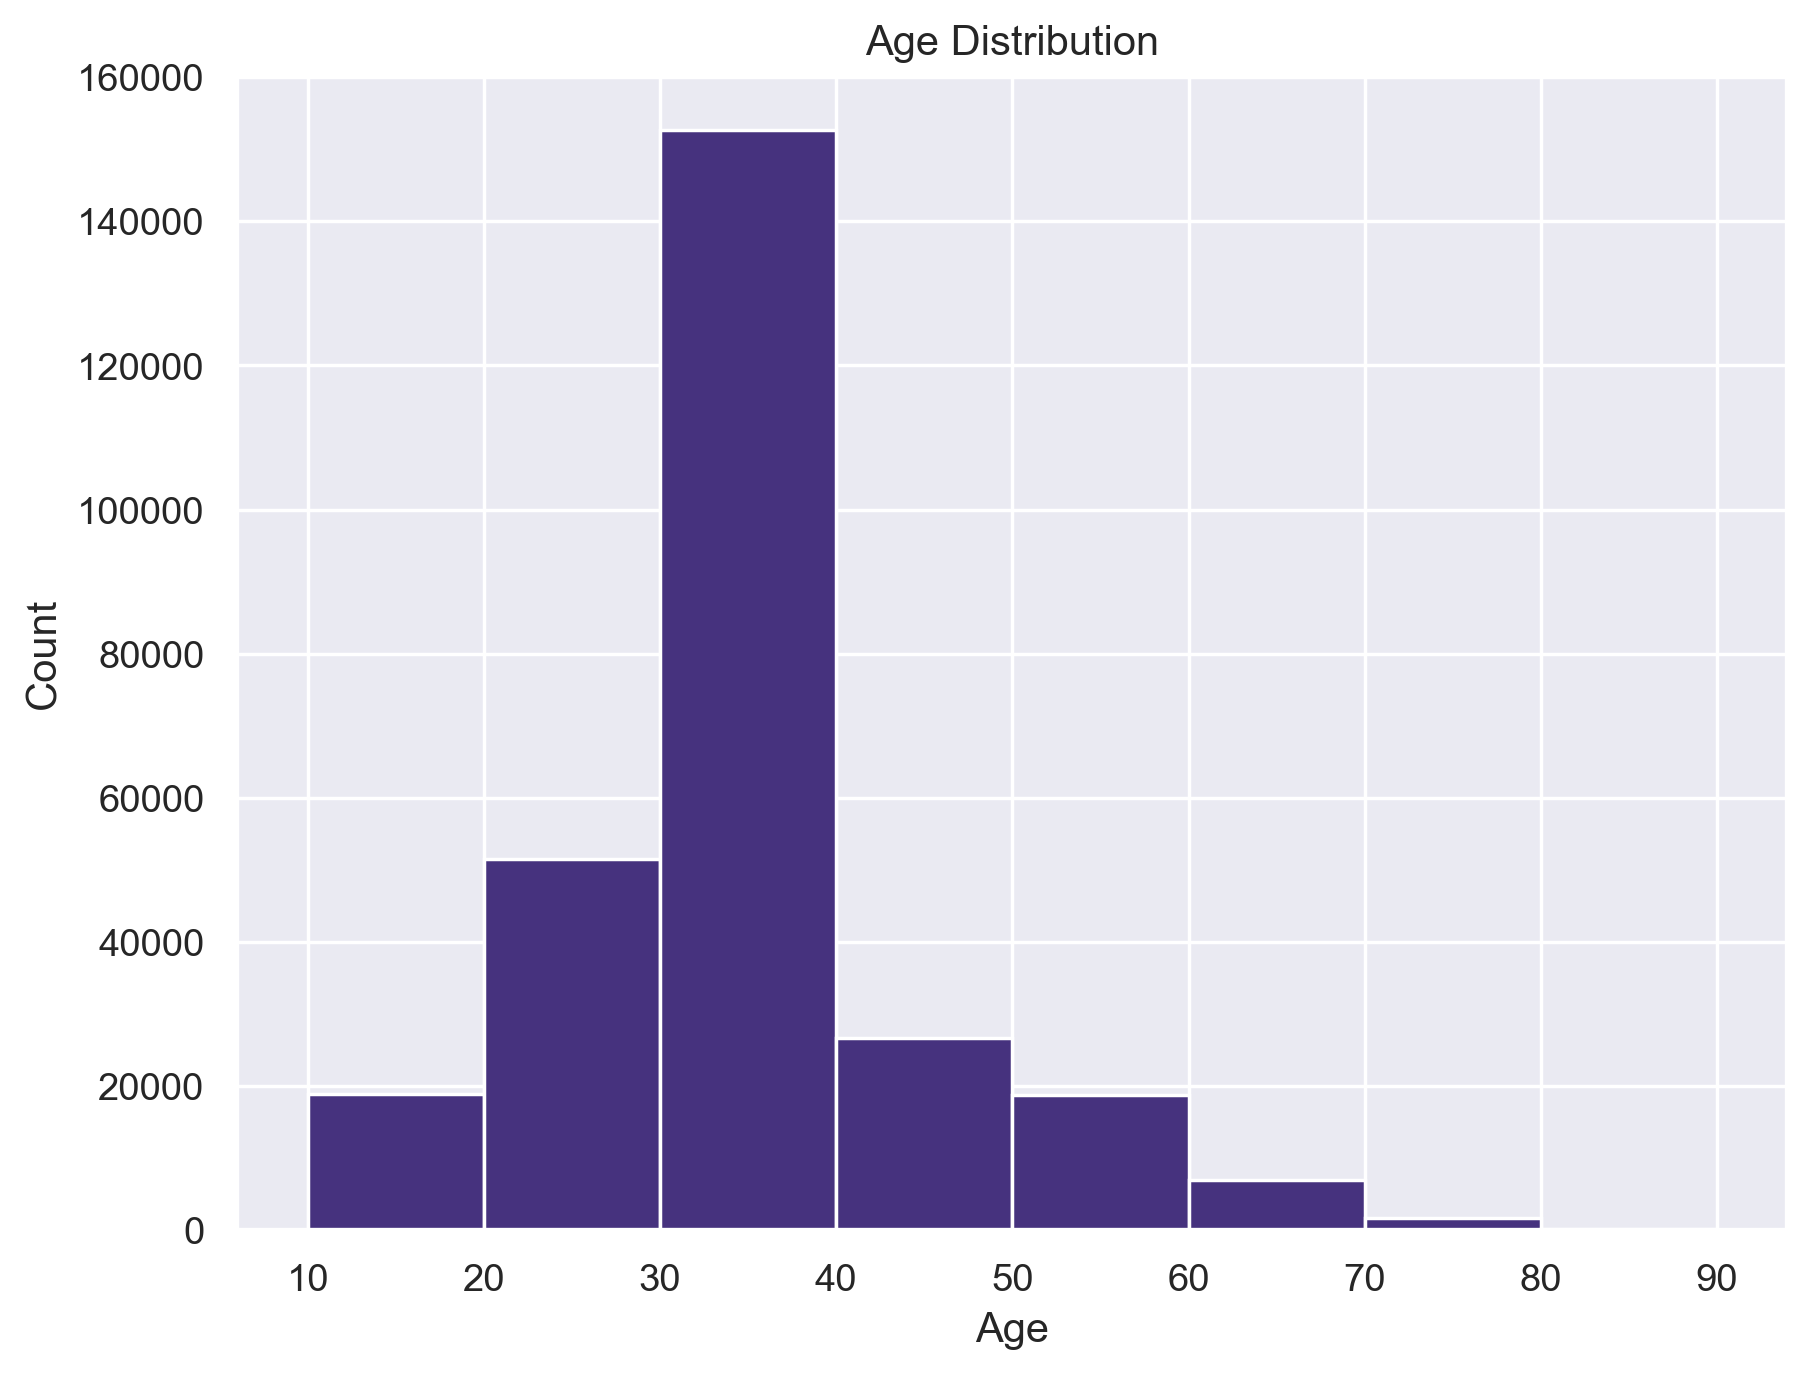

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution 
plt.figure(figsize=(8,6))
users.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

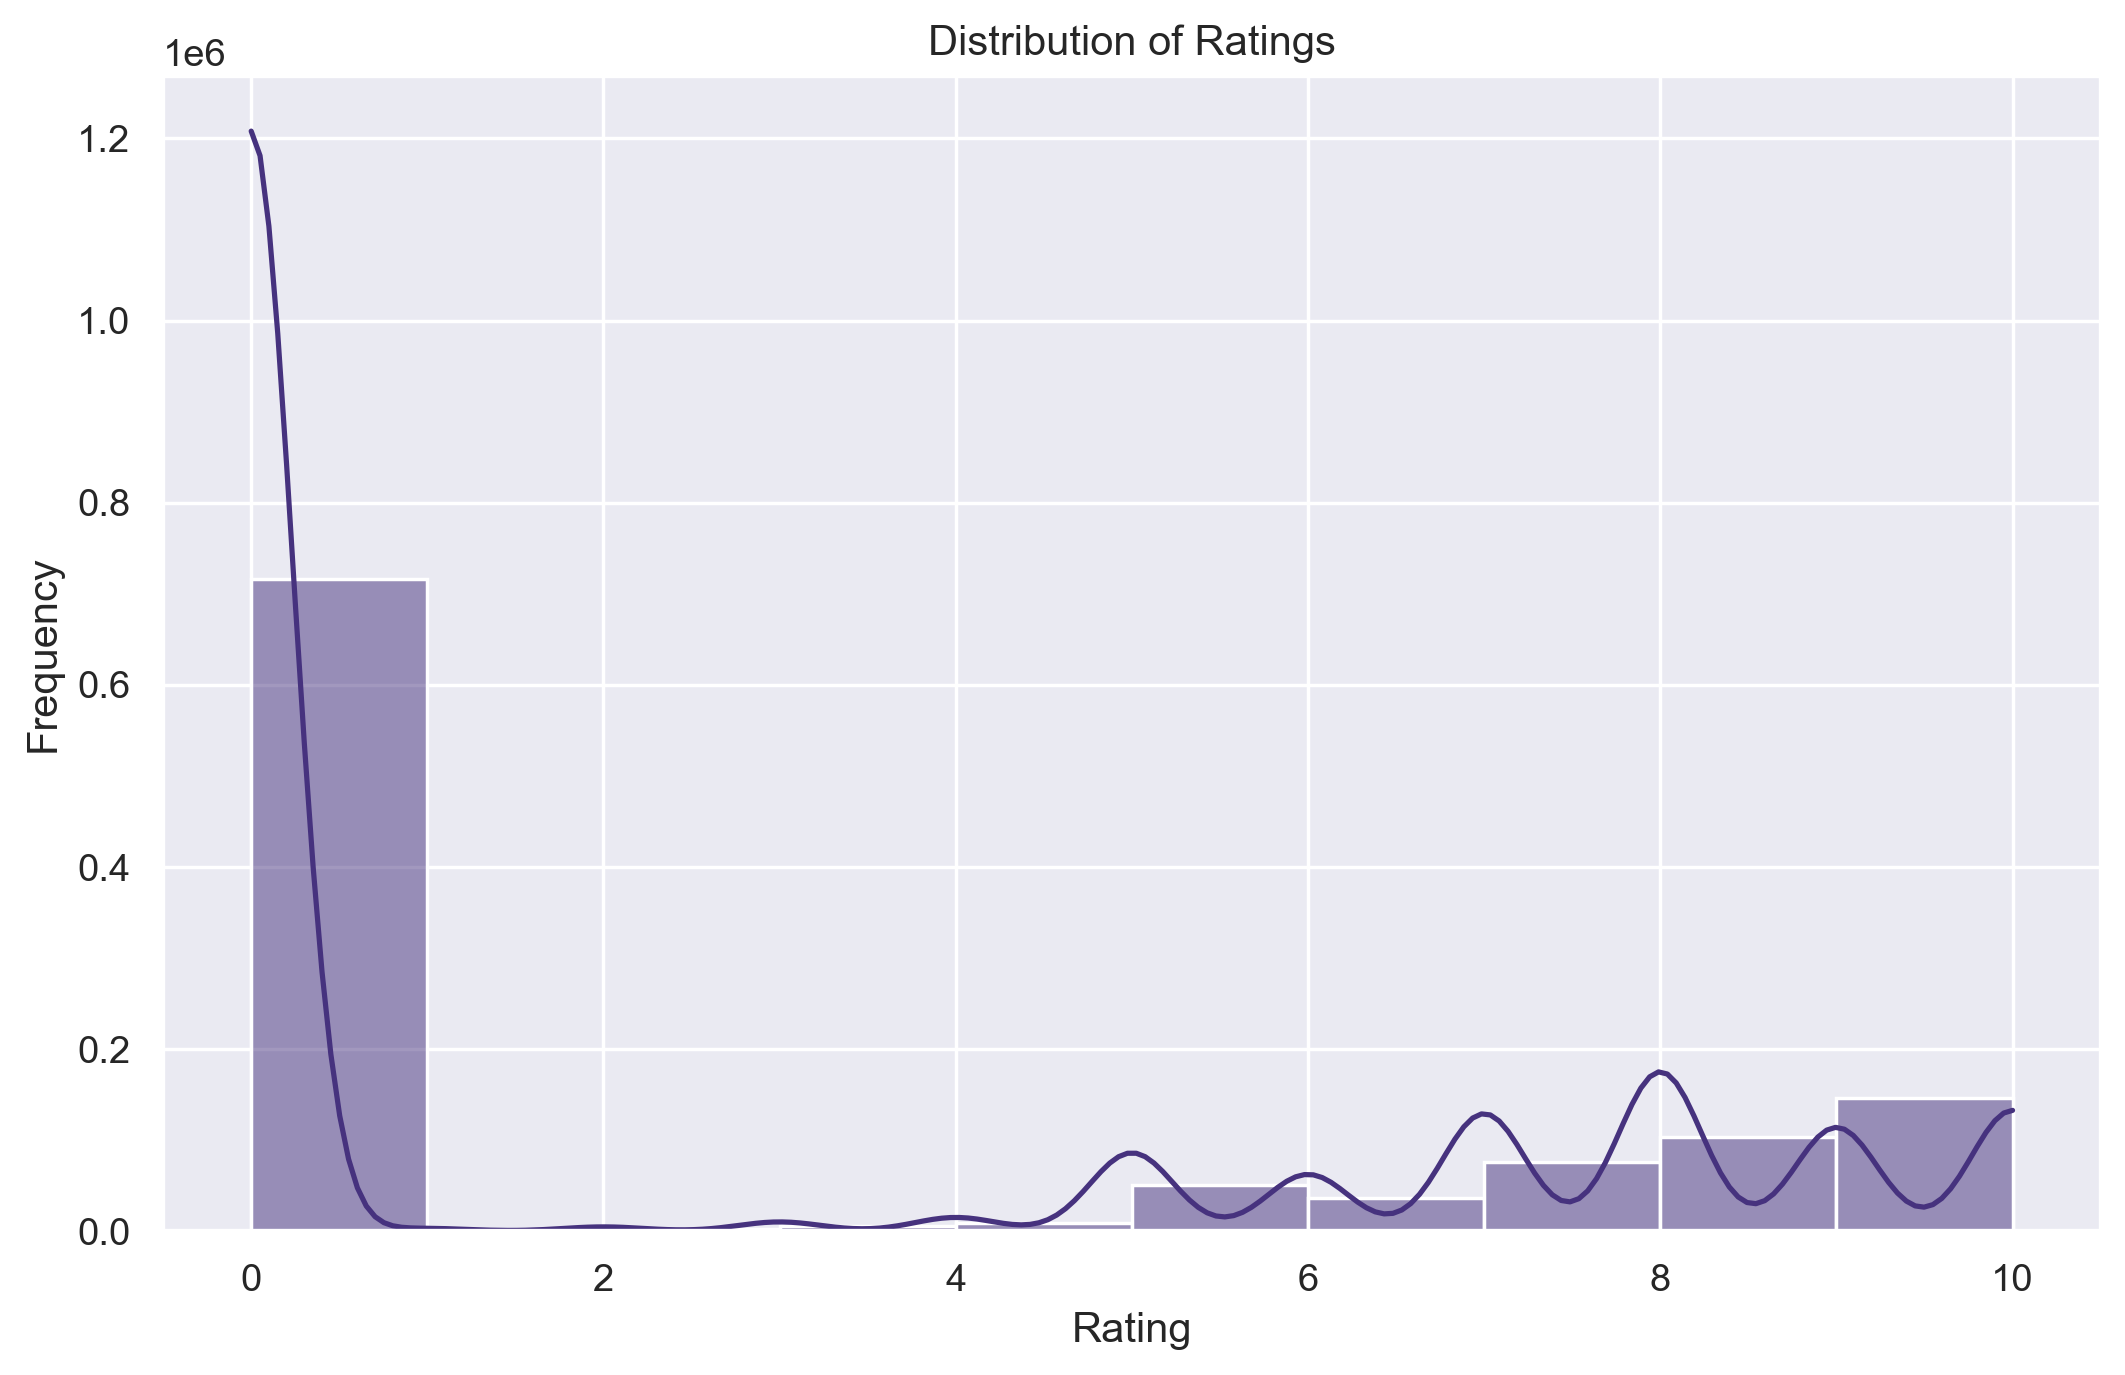

In [20]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['Book-Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


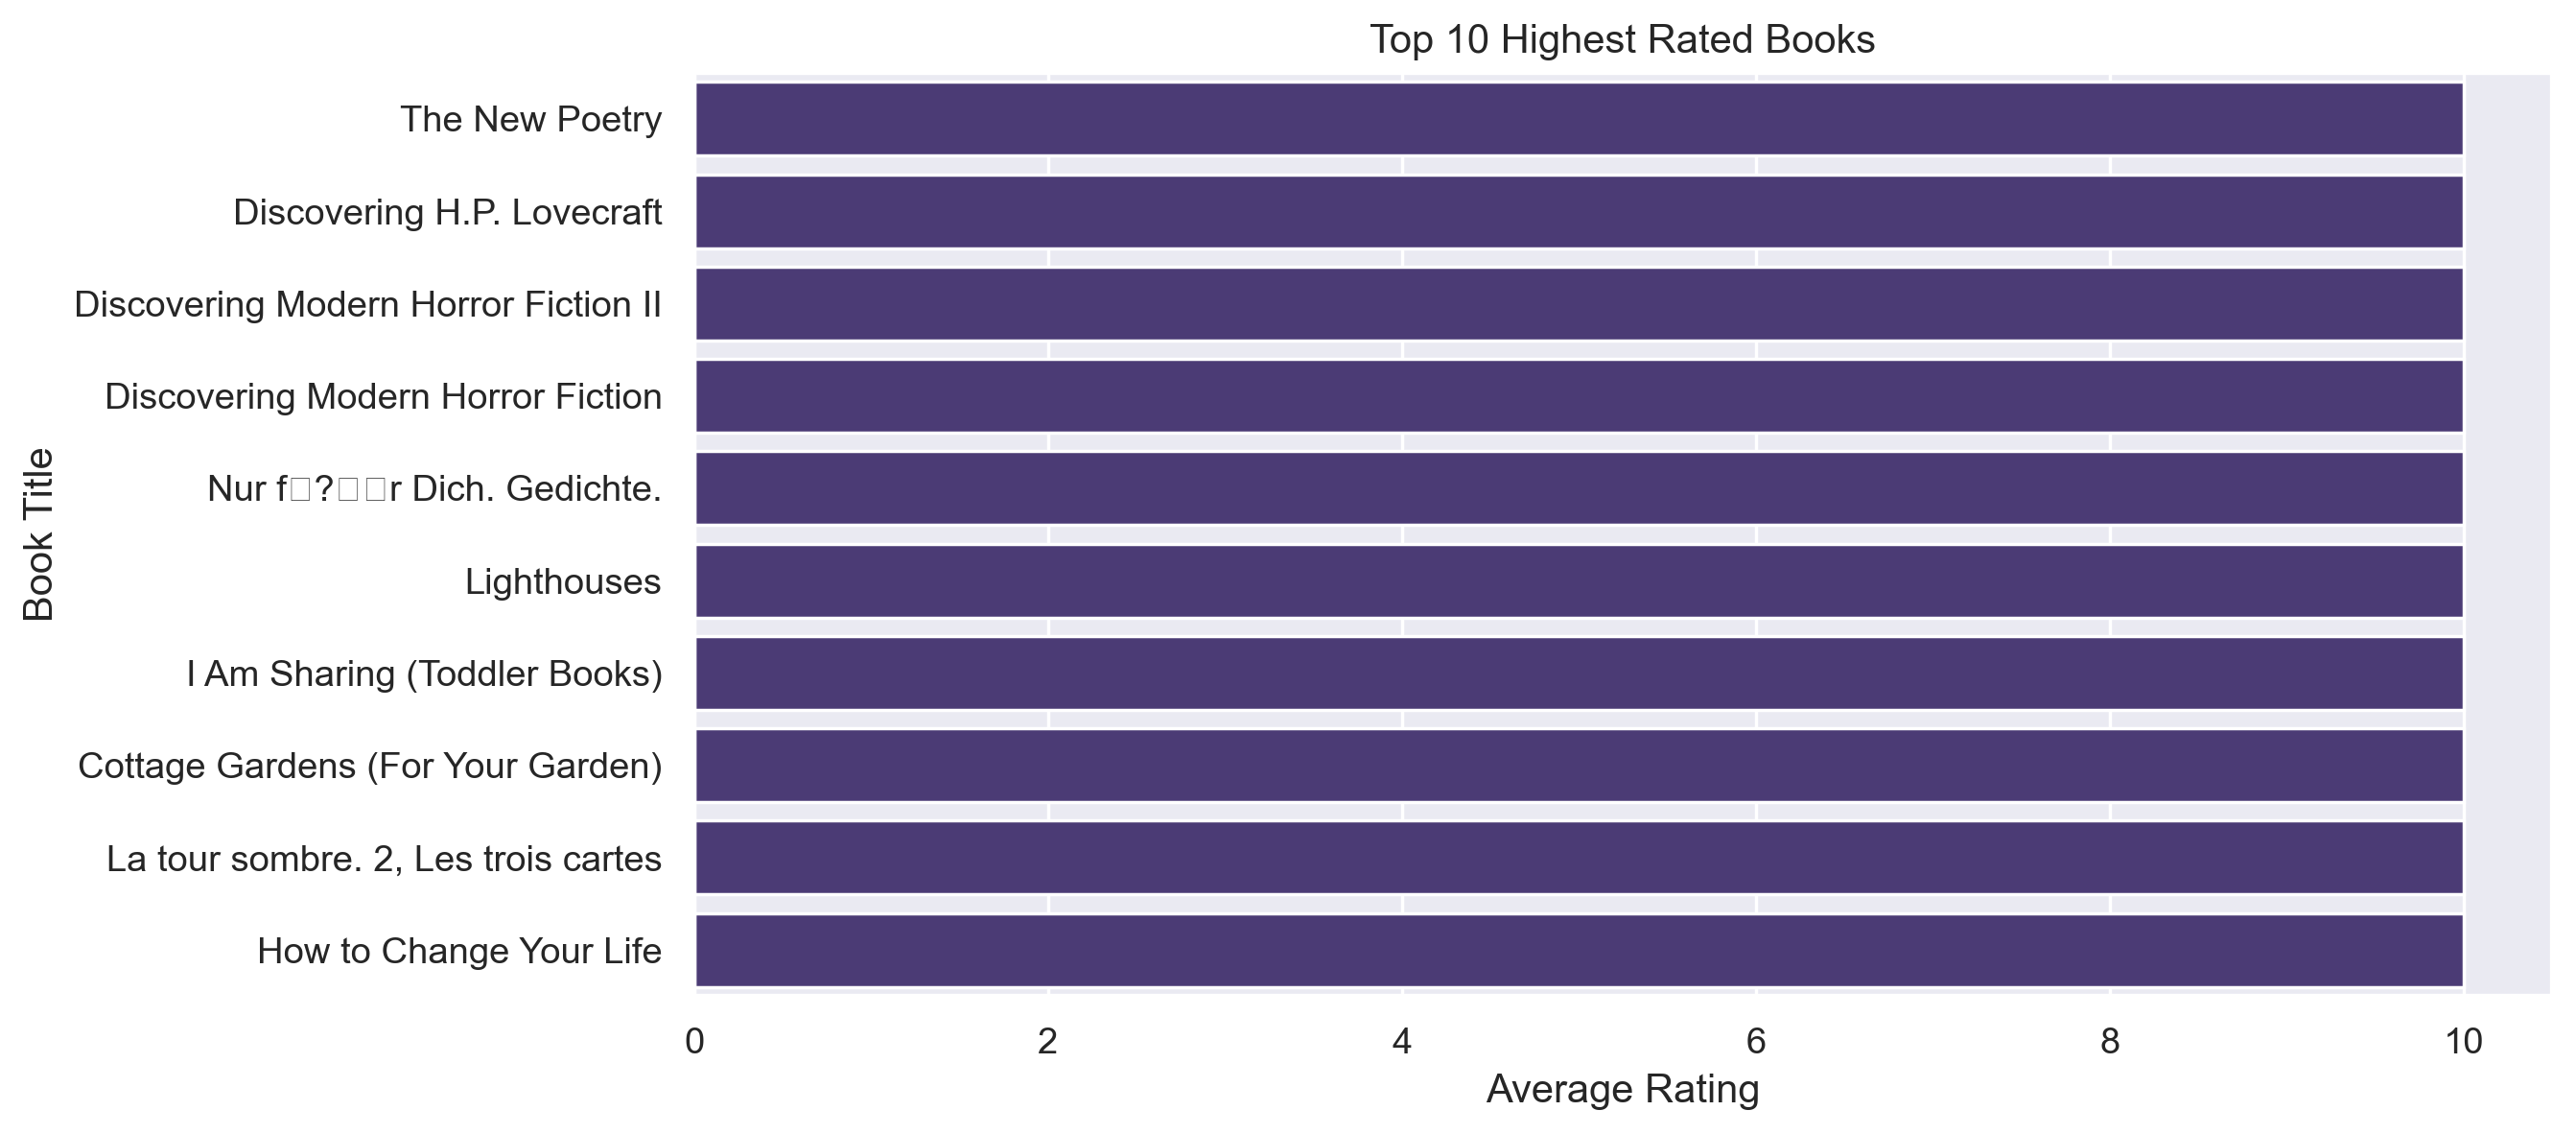

In [21]:
# Calculate the average rating for each book
average_rating = ratings.groupby('ISBN')['Book-Rating'].mean()

# Join with books DataFrame to get titles
average_rating = average_rating.reset_index().merge(books[['ISBN','Book-Title']], on='ISBN')

# Get top 10 rated books
top_rated_books = average_rating.sort_values('Book-Rating', ascending=False).head(10)

# Plot the top 10 rated books
sns.barplot(x='Book-Rating', y='Book-Title', data=top_rated_books)
plt.title('Top 10 Highest Rated Books')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()

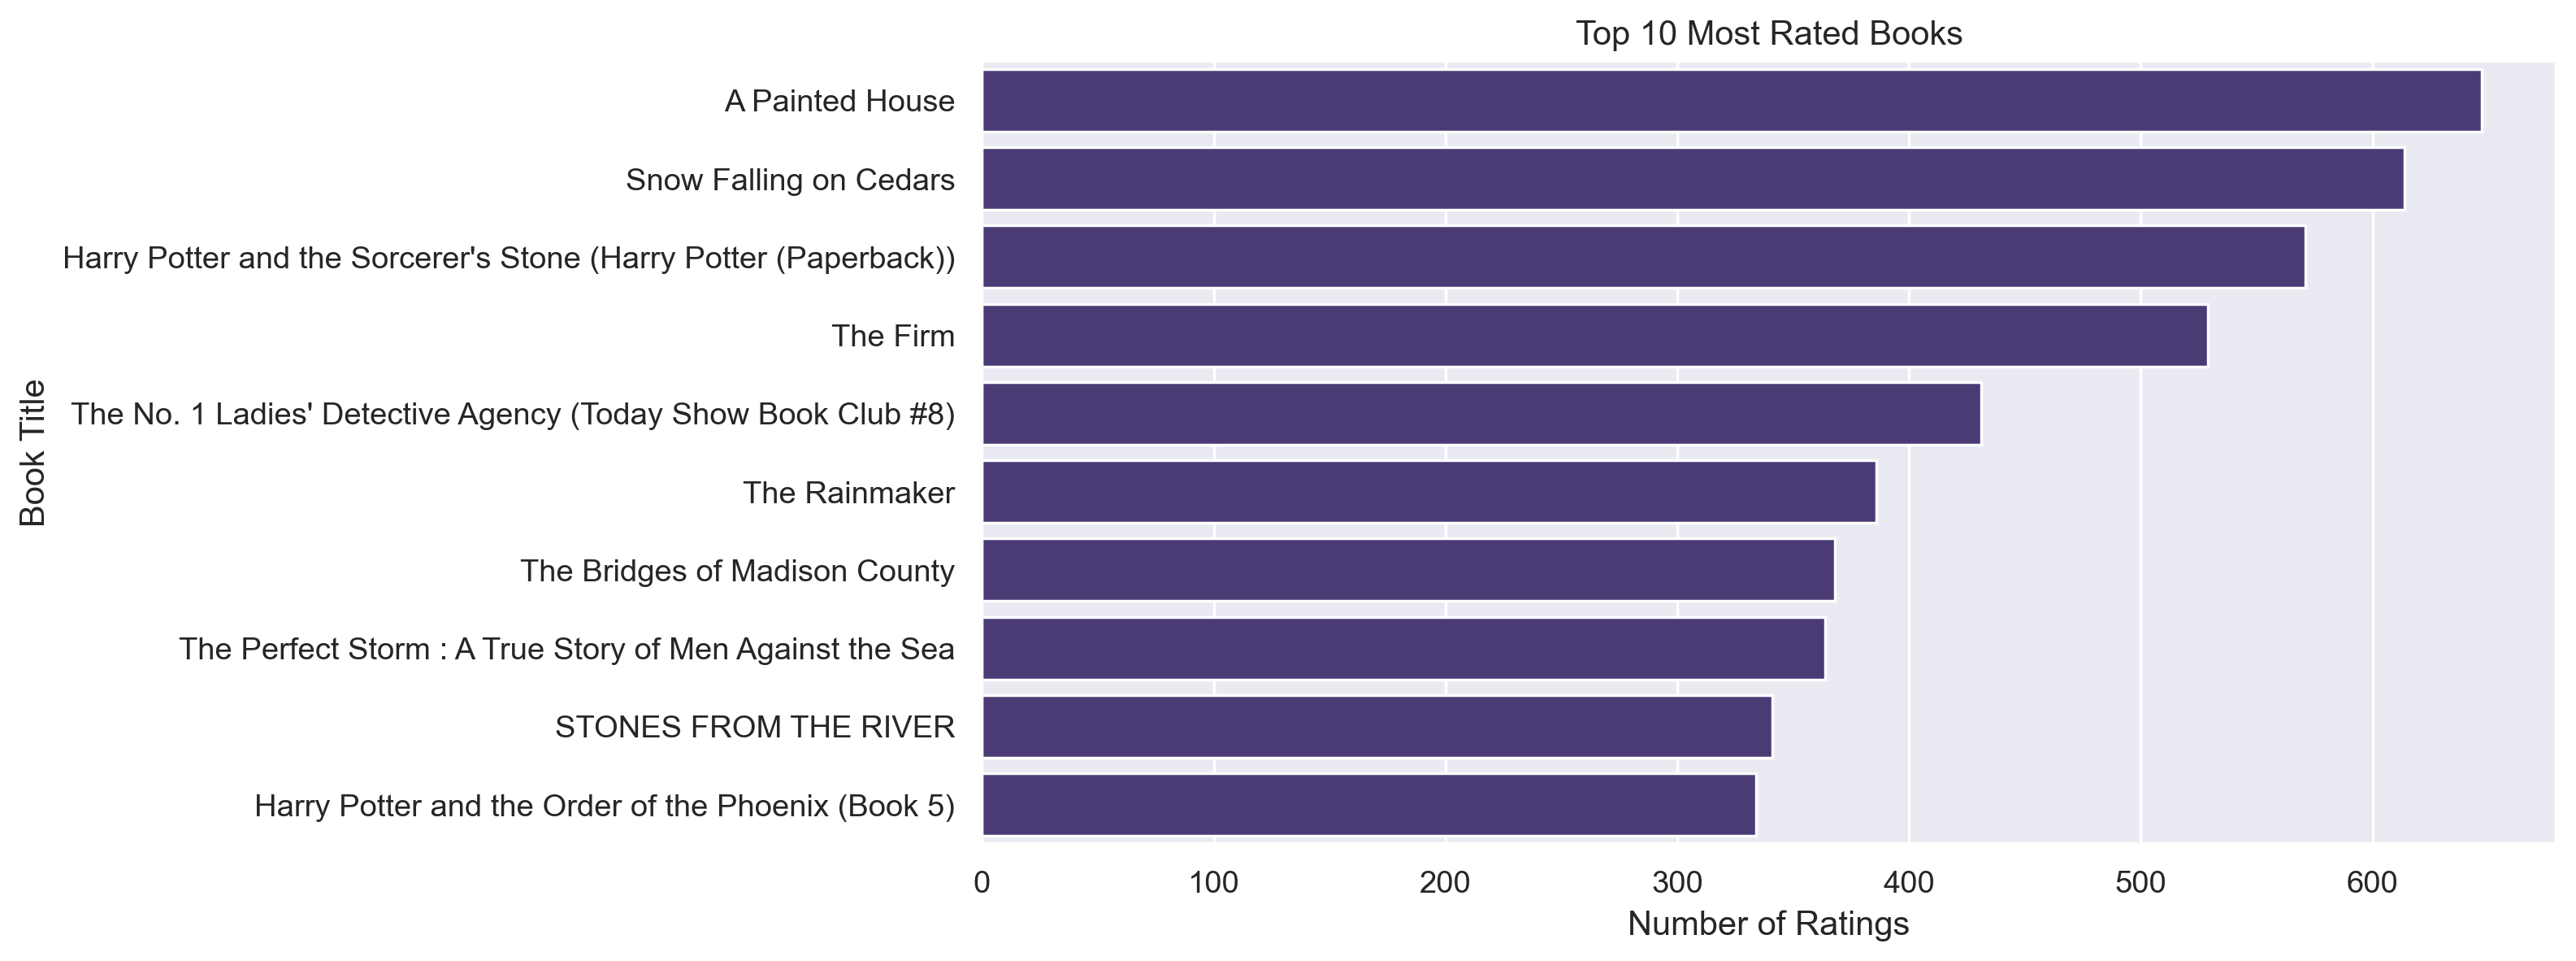

In [22]:
# Count the number of ratings for each book
book_ratings_count = ratings.groupby('ISBN')['Book-Rating'].count()

# Join with books DataFrame to get titles
book_ratings_count = book_ratings_count.reset_index().merge(books[['ISBN','Book-Title']], on='ISBN')

# Get top 10 most rated books
most_rated_books = book_ratings_count.sort_values('Book-Rating', ascending=False).head(10)

# Plot the top 10 most rated books
sns.barplot(x='Book-Rating', y='Book-Title', data=most_rated_books)
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()

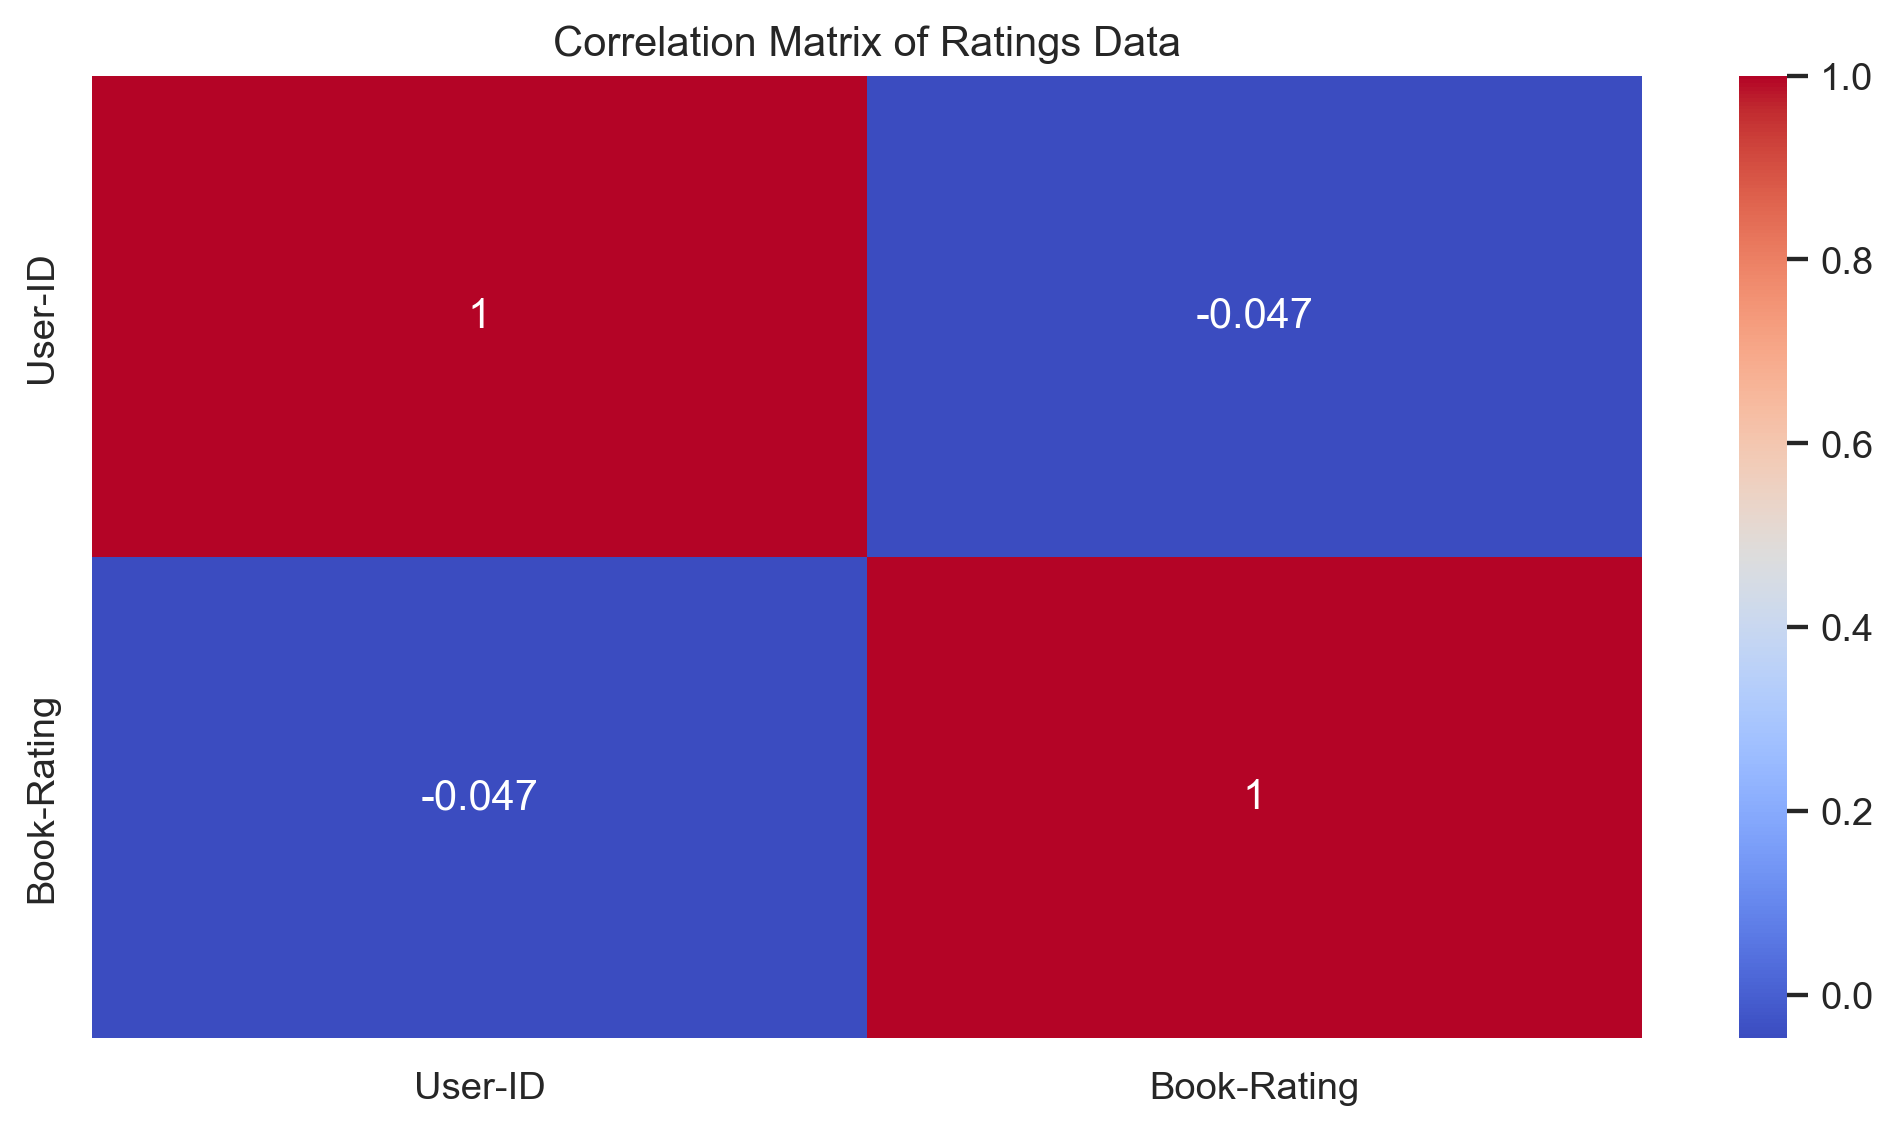

In [23]:
# Create a correlation matrix
correlation_matrix = ratings.corr()

# Plot a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Ratings Data')
plt.show()

In [24]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [25]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [26]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

In [10]:
user_with_rating = users.merge(ratings,on='User-ID')

In [13]:
final_df = user_with_rating.merge(books,on='ISBN')[['User-ID','ISBN','Book-Title','Book-Rating','Book-Author','Year-Of-Publication','Image-URL-S']]

In [14]:
final_df.head() 

,User-ID,ISBN,Book-Title,Book-Rating,Book-Author,Year-Of-Publication,Image-URL-S
0,2,195153448,Classical Mythology,0,Mark P. O. Morford,2002,http://images.amazon.com/images/P/0195153448.0...
1,8,2005018,Clara Callan,5,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
2,11400,2005018,Clara Callan,0,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
3,11676,2005018,Clara Callan,8,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
4,8,60973129,Decision in Normandy,0,Carlo D'Este,1991,http://images.amazon.com/images/P/0060973129.0...


In [23]:
final_df.tail()

,User-ID,ISBN,Book-Title,Book-Rating,Book-Author,Year-Of-Publication,Image-URL-S
21487,11520,055358099X,Cloud Nine,0,Luanne Rice,2000,http://images.amazon.com/images/P/055358099X.0...
21488,11601,055358099X,Cloud Nine,0,Luanne Rice,2000,http://images.amazon.com/images/P/055358099X.0...
21489,11676,553212583,Wuthering Heights,0,EMILY BRONTE,1983,http://images.amazon.com/images/P/0553212583.0...
21490,11676,689849176,Just Ella,0,Margaret Peterson Haddix,1999,http://images.amazon.com/images/P/0689849176.0...
21491,11993,440224845,Bittersweet,0,DANIELLE STEEL,2000,http://images.amazon.com/images/P/0440224845.0...


In [17]:
x = final_df.groupby(by='User-ID').count()['Book-Rating'].reset_index()

In [18]:
x.head()

,User-ID,Book-Rating
0,2,1
1,8,17
2,9,3
3,10,1
4,12,1


In [26]:
active_users = x[x['Book-Rating']>50]

In [29]:
active_users.shape

(63, 2)

In [32]:
active_users_rated = final_df[final_df['User-ID'].isin(list(active_users['User-ID']))]

In [33]:
active_users_rated.head() 

,User-ID,ISBN,Book-Title,Book-Rating,Book-Author,Year-Of-Publication,Image-URL-S
3,11676,2005018,Clara Callan,8,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...
9,11676,399135782,The Kitchen God's Wife,9,Amy Tan,1991,http://images.amazon.com/images/P/0399135782.0...
12,11676,671870432,PLEADING GUILTY,8,Scott Turow,1993,http://images.amazon.com/images/P/0671870432.0...
16,11676,771074670,Nights Below Station Street,0,David Adams Richards,1988,http://images.amazon.com/images/P/0771074670.0...
21,3363,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,0,Jack Canfield,1998,http://images.amazon.com/images/P/1558746218.0...


In [55]:
active_users_rated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8487 entries, 3 to 21490
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              8487 non-null   int64 
 1   ISBN                 8487 non-null   object
 2   Book-Title           8487 non-null   object
 3   Book-Rating          8487 non-null   int64 
 4   Book-Author          8487 non-null   object
 5   Year-Of-Publication  8487 non-null   int64 
 6   Image-URL-S          8487 non-null   object
dtypes: int64(3), object(4)
memory usage: 530.4+ KB


In [43]:
active_users_rated.duplicated().sum()

0

In [39]:
active_users_rated.shape

(8487, 7)

In [61]:
y = active_users_rated.groupby('Book-Title').count()['Book-Rating'].reset_index() 

In [62]:
y.head()

,Book-Title,Book-Rating
0,".NET Framework Essentials, 3rd Edition",1
1,01-01-00: A Novel of the Millennium,1
2,1001 Things Everyone Should Know About Science,1
3,101 Bright Ideas: Esl Activities for All Ages,1
4,101 Dalmatians,2


In [67]:
popular_books = y[y['Book-Rating']>=10] 

In [70]:
popular_df = active_users_rated[active_users_rated['Book-Title'].isin(list(popular_books['Book-Title']))]

In [73]:
pt = popular_df.pivot_table(values='Book-Rating',columns='User-ID',index='Book-Title').fillna(0)

In [74]:
from sklearn.metrics.pairwise import cosine_similarity

In [77]:
from sklearn.neighbors import NearestNeighbors 

In [125]:
pt_num = pt.to_numpy()

In [126]:
# Fit the KNN model
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(pt_num) 

NearestNeighbors(algorithm='brute', metric='cosine')

In [127]:
np.where(pt.index=='Black Notice')[0][0]

2

In [129]:
distances, indices = knn.kneighbors([pt_num[2]])

In [130]:
for i in indices[0][1:]:
    print(pt.index[i])  

The Testament
The Street Lawyer
Lucky : A Memoir
The Pelican Brief


In [133]:
def suggetion(book_name):
    sugg_books = []
    book_index = np.where(pt.index==book_name)[0][0]
    distances, indices = knn.kneighbors([pt_num[book_index]])
    for i in indices[0][1:]:
        sugg_books.append(pt.index[i]) 
    return sugg_books 
        
    

In [134]:
suggetion('Black Notice')

['The Testament', 'The Street Lawyer', 'Lucky : A Memoir', 'The Pelican Brief']